In [2]:
#load the data
import pandas as pd
import numpy as np
data = pd. read_csv('usa_housing_price.csv')
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,size,Price
0,79545.45857,5.317139,7.009188,23086.80050,188.214212,1.059034e+06
1,79248.64245,4.997100,6.730821,40173.07217,160.042526,1.505891e+06
2,61287.06718,5.134110,8.512727,36882.15940,227.273544,1.058988e+06
3,63345.24005,3.811764,5.586729,34310.24283,164.816630,1.260617e+06
4,59982.19723,5.959445,7.839388,26354.10947,161.966659,6.309435e+05


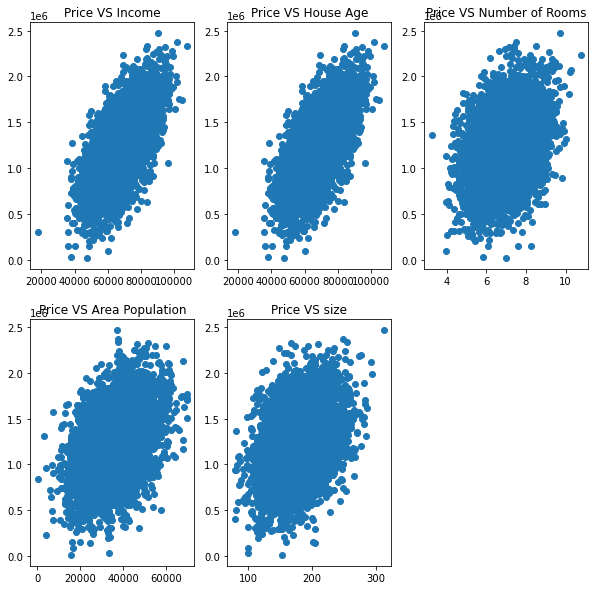

In [14]:
%matplotlib inline
from matplotlib import pyplot as plt
fig=plt.figure(figsize=(10,10))
fig1=plt.subplot(231)
plt.scatter(data.loc[:,'Avg. Area Income'],data.loc[:,'Price'])
plt.title('Price VS Income')

fig2=plt.subplot(232)
plt.scatter(data.loc[:,'Avg. Area Income'],data.loc[:,'Price'])
plt.title('Price VS House Age')

fig3=plt.subplot(233)
plt.scatter(data.loc[:,'Avg. Area Number of Rooms'],data.loc[:,'Price'])
plt.title('Price VS Number of Rooms')

fig4=plt.subplot(234)
plt.scatter(data.loc[:,'Area Population'],data.loc[:,'Price'])
plt.title('Price VS Area Population')

fig5=plt.subplot(235)
plt.scatter(data.loc[:,'size'],data.loc[:,'Price'])
plt.title('Price VS size')

plt.show()

In [15]:
#define x and y
x = data.loc[:,'size']
y = data.loc[:,'Price']
x.head()


0    188.214212
1    160.042526
2    227.273544
3    164.816630
4    161.966659
Name: size, dtype: float64

In [16]:
print(x,y)

0       188.214212
1       160.042526
2       227.273544
3       164.816630
4       161.966659
           ...    
4995    161.641403
4996    159.164596
4997    139.491785
4998    184.845371
4999    148.589423
Name: size, Length: 5000, dtype: float64 0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64


In [17]:
x=np.array(x).reshape(-1,1)
print(x.shape)

(5000, 1)


In [18]:
# set up the linear regression model
from sklearn.linear_model import LinearRegression
LR1 = LinearRegression()
LR1.fit(x,y)

LinearRegression()

In [20]:
#calculate the price vs size
y_predict_1=LR1.predict(x)
print(y_predict_1)

[1276881.85636622 1173363.58767144 1420407.32457443 ... 1097848.86467426
 1264502.88144558 1131278.58816273]


In [30]:
#evalute the model
from sklearn.metrics import mean_squared_error,r2_score
mean_squared_error_1 = mean_squared_error(y,y_predict_1)
r2_score_1 = r2_score(y,y_predict_1)
print(mean_squared_error_1,r2_score_1)

108771672553.6264 0.1275031240418234


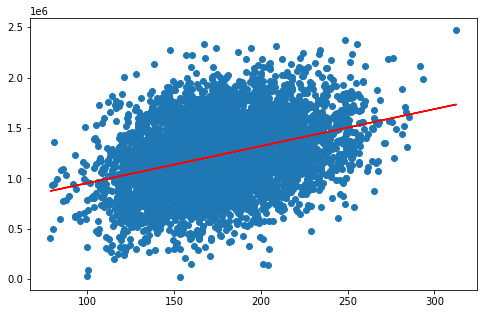

In [31]:
#可视化
fig6 = plt.figure(figsize=(8,5))
plt.scatter(x,y)
plt.plot(x,y_predict_1,'r')
plt.show()

In [35]:
#define x_multi
x_multi=data.drop(['Price'],axis=1)#就是原数据把price drop掉
x_multi

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,size
0,79545.45857,5.317139,7.009188,23086.80050,188.214212
1,79248.64245,4.997100,6.730821,40173.07217,160.042526
2,61287.06718,5.134110,8.512727,36882.15940,227.273544
3,63345.24005,3.811764,5.586729,34310.24283,164.816630
4,59982.19723,5.959445,7.839388,26354.10947,161.966659
...,...,...,...,...,...
4995,60567.94414,3.169638,6.137356,22837.36103,161.641403
4996,78491.27543,4.000865,6.576763,25616.11549,159.164596
4997,63390.68689,3.749409,4.805081,33266.14549,139.491785
4998,68001.33124,5.465612,7.130144,42625.62016,184.845371


In [36]:
LR_multi=LinearRegression()
LR_multi.fit(x_multi,y)

LinearRegression()

In [39]:
#make prediction
y_predict_multi=LR_multi.predict(x_multi)
print(y,y_predict_multi)

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64 [1223968.89166085 1497306.33188629 1250884.31019438 ... 1020693.92390375
 1260503.36914586 1302737.7915763 ]


In [40]:
mean_squared_error_multi = mean_squared_error(y,y_predict_multi)
r2_score_multi = r2_score(y,y_predict_multi)
print(mean_squared_error_multi,r2_score_multi)

10219846512.177862 0.9180229195220739


In [42]:
print(mean_squared_error_1)

108771672553.6264


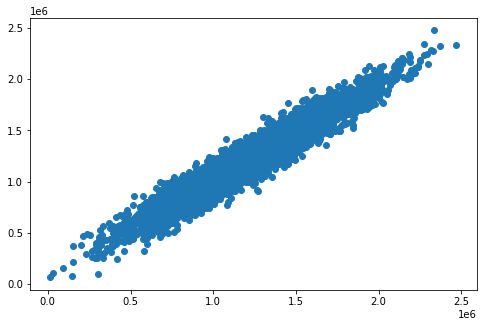

In [44]:
fig7=plt.figure(figsize=(8,5))
plt.scatter(y,y_predict_multi)
plt.show()

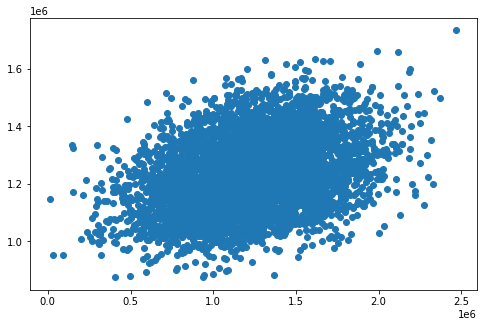

In [45]:
fig7=plt.figure(figsize=(8,5))
plt.scatter(y,y_predict_1)
plt.show()

In [49]:
x_test=[65000,5,5,3000,200]
x_test=np.array(x_test).reshape(1,-1)
print(x_test)

[[65000     5     5  3000   200]]


In [50]:
y_test_predict=LR_multi.predict(x_test)
print(y_test_predict)

[408469.22256845]
